In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
# Importing the dataset
df = pd.read_csv('Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

In [ ]:
# Checking missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# Splitting features and target variable
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Building the ANN
classifier = Sequential()
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform'))


In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2)


Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 25708883607552.0000 - val_loss: 26268995158016.0000
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 25708879413248.0000 - val_loss: 26268993060864.0000
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 25708875218944.0000 - val_loss: 26268988866560.0000
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 25708862636032.0000 - val_loss: 26268972089344.0000
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 25708845858816.0000 - val_loss: 26268944826368.0000
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 25708808110080.0000 - val_loss: 26268900786176.0000
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 25708757778432.0000 - val_loss: 26268833677312.0000
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 25708684378112.0000 - val_loss: 26268747694080.0000


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [ ]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 

In [ ]:
# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 27123934845069.293


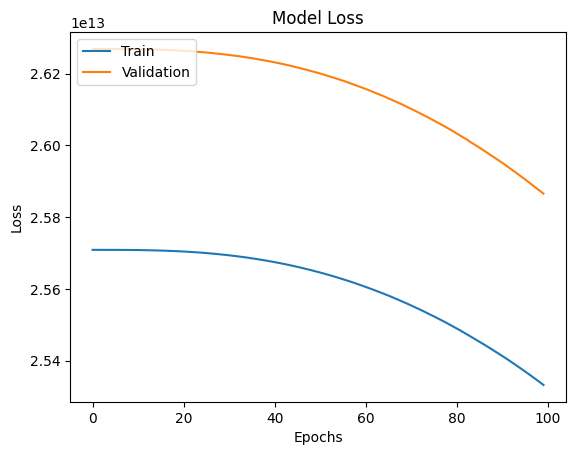

In [ ]:

# Visualizing the Training History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
def predict_price(num_bedrooms):
    new_data = np.array([num_bedrooms] + [0] * (X.shape[1] - 1)).reshape(1, -1)

    predicted_price = model.predict(new_data)
    return predicted_price[0]
num_bedrooms = float(input("Enter the number of bedrooms: "))

predicted_price = predict_price(num_bedrooms)
print("Predicted Price:", predicted_price)

Enter the number of bedrooms: 6
Predicted Price: 8066982.131995971
